In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# ----- Load dataset -----
file_path = os.path.join("data", "snapshot_explore.xlsx")  # adjust filename if needed
df = pd.read_excel(file_path)  # requires: pip install openpyxl

# ----- Define numeric columns -----
numeric_cols = [
    "Active users", "New users", "Returning users",
    "Scrolled users", "Engaged sessions", "Average session duration"
]

# ----- Summary statistics table (mean, median, min, max) -----
summary_stats = pd.DataFrame({
    "Mean": df[numeric_cols].mean(),
    "Median": df[numeric_cols].median(),
    "Min": df[numeric_cols].min(),
    "Max": df[numeric_cols].max()
})
print("\n=== Summary Statistics (All Users Metrics) ===")
print(summary_stats)

# ----- Top countries for each metric -----
top_countries = {}
for col in numeric_cols:
    if "Country" in df.columns:
        top_countries[col] = (
            df.groupby("Country")[col]
              .sum()
              .sort_values(ascending=False)
              .head(10)  # top 10 countries
              .reset_index()
        )
        print(f"\n=== Top Countries by {col} ===")
        print(top_countries[col])

# ----- (Optional) Save to Excel with multiple sheets -----
with pd.ExcelWriter("data_exploration_summary.xlsx", engine="openpyxl") as writer:
    summary_stats.to_excel(writer, sheet_name="Summary_Stats")
    for col, table in top_countries.items():
        table.to_excel(writer, sheet_name=f"Top_{col.replace(' ', '_')}", index=False)



=== Summary Statistics (All Users Metrics) ===
                                Mean      Median  Min            Max
Active users              734.263277    9.000000  0.0  137183.000000
New users                 603.872316    7.000000  0.0  127552.000000
Returning users           118.428814    2.000000  0.0   11252.000000
Scrolled users            161.988136    3.000000  0.0   24436.000000
Engaged sessions          463.307910    7.000000  0.0   59098.000000
Average session duration  402.800530  309.451192  0.0    8010.771178

=== Top Countries by Active users ===
         Country  Active users
0  United States       1032242
1        Vietnam         85087
2       Malaysia         43663
3         Canada         28984
4    Philippines         17319
5          India         15814
6      Singapore          6927
7    Puerto Rico          6381
8      Australia          4355
9          Japan          3826

=== Top Countries by New users ===
         Country  New users
0  United States     8537

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 5)


Rows: 7 | Columns: 2
Columns: ['Country', 'Active users']

Missing values:
 Country         0
Active users    0
dtype: int64

Top 10 Countries by Active Users:
 Country
US    1052892
VN      71066
MY      40235
CA      38141
PH      16849
IN      16830
SG       8269
Name: Active users, dtype: int64


C:\Users\billy\AppData\Local\Temp\ipykernel_18812\2845150479.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_country.index, y=top_country.values, palette="crest")


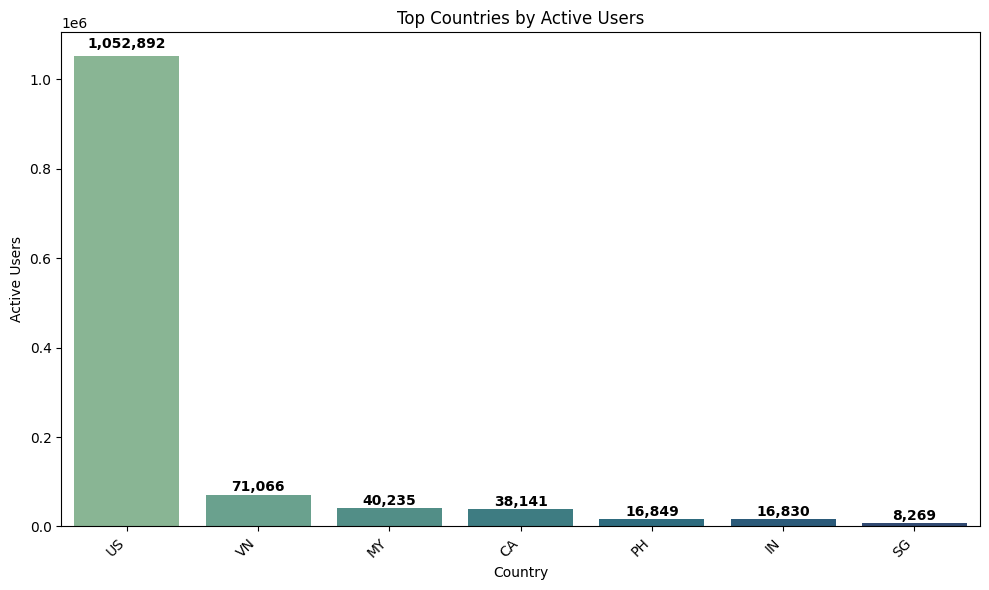

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load ---
df_country = pd.read_excel("data/user_attr_country.xlsx")

# --- Basic Info ---
print("Rows:", df_country.shape[0], "| Columns:", df_country.shape[1])
print("Columns:", df_country.columns.tolist())
print("\nMissing values:\n", df_country.isnull().sum())

# --- Findings: Top 10 Countries by Active Users ---
top_country = (
    df_country.groupby("Country")["Active users"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 Countries by Active Users:\n", top_country)

# --- Visualization with data labels ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_country.index, y=top_country.values, palette="crest")

# Add numeric labels above bars
for i, value in enumerate(top_country.values):
    ax.text(
        i, 
        value + (value * 0.01),  # small offset above the bar
        f"{int(value):,}",        # format with commas
        ha="center", 
        va="bottom", 
        fontsize=10, 
        fontweight="bold"
    )

plt.title("Top Countries by Active Users")
plt.xlabel("Country")
plt.ylabel("Active Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Rows: 15753 | Columns: 2
Columns: ['City', 'Active users']

Missing values:
 City            0
Active users    0
dtype: int64

Top 15 Cities by Active Users:
 City
New York            113319
Santa Clara          35551
Los Angeles          28161
Miami                19970
Dallas               19526
Chicago              19098
Kuala Lumpur         18807
Hanoi                18713
Ashburn              17921
Ho Chi Minh City     17552
Houston              14453
Atlanta              13725
San Jose             12476
Boston               10555
Phoenix              10059
Name: Active users, dtype: int64


C:\Users\billy\AppData\Local\Temp\ipykernel_18812\33437673.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_city.index, y=top_city.values, palette="viridis")


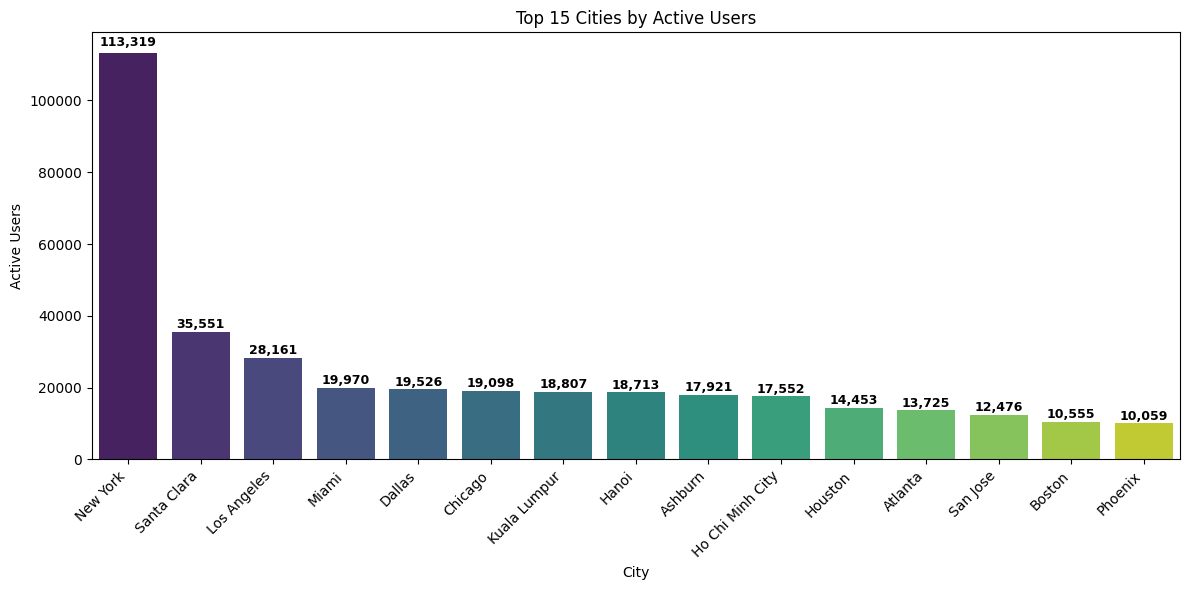

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load ---
df_city = pd.read_excel("data/user_attr_city.xlsx")

# --- Basic Info ---
print("Rows:", df_city.shape[0], "| Columns:", df_city.shape[1])
print("Columns:", df_city.columns.tolist())
print("\nMissing values:\n", df_city.isnull().sum())

# --- Findings: Top 15 Cities by Active Users ---
top_city = (
    df_city.groupby("City")["Active users"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
print("\nTop 15 Cities by Active Users:\n", top_city)

# --- Visualization with data labels ---
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_city.index, y=top_city.values, palette="viridis")

# Add numeric labels on top of bars
for i, value in enumerate(top_city.values):
    ax.text(
        i,
        value + (value * 0.01),      # offset slightly above each bar
        f"{int(value):,}",           # formatted with commas
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.title("Top 15 Cities by Active Users")
plt.xlabel("City")
plt.ylabel("Active Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import re

# --- Load your city file (City + Active users) ---
df_city = pd.read_excel("data/user_attr_city.xlsx")

print("Initial rows in df_city:", len(df_city))
print("df_city columns:", df_city.columns.tolist())

# --- Load US city-to-state reference file ---
# This is your us_cities.csv from simplemaps or similar
us_ref = pd.read_csv("data/us_cities.csv")

print("\nColumns in us_cities.csv:", us_ref.columns.tolist())

# We already know from your printout that:
# city_ref_col  = 'city'
# state_id_col  = 'state_id'
# state_name_col = 'state_name'

city_ref_col = "city"
state_id_col = "state_id"
state_name_col = "state_name"

# --- Clean city names in BOTH dataframes using the SAME column name: 'city_clean' ---
def clean_city(s):
    if pd.isna(s):
        return None
    s = str(s).strip()
    s = re.sub(r"\s+", " ", s)           # collapse multiple spaces
    s = re.sub(r"\(.*?\)", "", s).strip() # remove things in parentheses
    return s.lower()

# Add 'city_clean' to your df_city
df_city["city_clean"] = df_city["City"].apply(clean_city)

# Add 'city_clean' to the reference df
us_ref["city_clean"] = us_ref[city_ref_col].astype(str).apply(lambda x: x.strip().lower())

print("\nSample of cleaned df_city['city_clean']:", df_city["city_clean"].head())
print("Sample of cleaned us_ref['city_clean']:", us_ref["city_clean"].head())

# --- Merge your city data with the US reference on 'city_clean' ---
df_merged = df_city.merge(
    us_ref[["city_clean", state_id_col, state_name_col]],
    on="city_clean",
    how="left"
)

# Rename for consistency
df_merged = df_merged.rename(
    columns={
        state_id_col: "US_State_Abbrev",
        state_name_col: "US_State",
    }
)

# --- Keep only rows that matched a US state ---
df_us_only = df_merged[df_merged["US_State_Abbrev"].notna()].copy()

print(f"\nUS rows kept: {len(df_us_only)} out of {len(df_city)}")
print("Sample of mapped rows:")
print(df_us_only[["City", "city_clean", "US_State_Abbrev", "US_State"]].head())

# --- Aggregate by state ---
df_state_summary = (
    df_us_only.groupby(["US_State_Abbrev", "US_State"])["Active users"]
    .sum()
    .reset_index()
    .sort_values("Active users", ascending=False)
)

print("\nState-level summary (top 10):")
print(df_state_summary.head(10))

# # --- Save outputs ---
# df_us_only.to_csv("data/city_us_only.csv", index=False)
# df_state_summary.to_csv("data/city_us_by_state_summary.csv", index=False)

# print("\n✔ Saved:")
# print(" - data/city_us_only.csv")
# print(" - data/city_us_by_state_summary.csv")


Initial rows in df_city: 15753
df_city columns: ['City', 'Active users']

Columns in us_cities.csv: ['city', 'city_ascii', 'state_id', 'state_name', 'county_fips', 'county_name', 'lat', 'lng', 'population', 'density', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id']

Sample of cleaned df_city['city_clean']: 0       new york
1    santa clara
2    los angeles
3          miami
4         dallas
Name: city_clean, dtype: object
Sample of cleaned us_ref['city_clean']: 0       new york
1    los angeles
2        chicago
3          miami
4        houston
Name: city_clean, dtype: object

US rows kept: 17206 out of 15753
Sample of mapped rows:
          City   city_clean US_State_Abbrev    US_State
0     New York     new york              NY    New York
1  Santa Clara  santa clara              CA  California
2  Santa Clara  santa clara              OR      Oregon
3  Santa Clara  santa clara              UT        Utah
4  Santa Clara  santa clara              NM  New Mexic

In [6]:
import plotly.express as px

# Helper: convert values to thousands (K)
def format_k(x):
    return f"{round(x/1000, 1)}K"

# --- Build the choropleth ---
fig = px.choropleth(
    df_state_summary,
    locations="US_State_Abbrev",
    locationmode="USA-states",
    color="Active users",
    color_continuous_scale="Blues",
    scope="usa",
    hover_name="US_State",
    labels={"Active users": "Active Users"},
)

# --- Add larger labels on top of states ---
for _, row in df_state_summary.iterrows():
    fig.add_scattergeo(
        locationmode="USA-states",
        locations=[row["US_State_Abbrev"]],
        text=[format_k(row["Active users"])],
        mode="text",
        showlegend=False,
        textfont=dict(
            color="black",
            size=20,          # <<< ADJUST LABEL SIZE HERE
            family="Arial"
        )
    )

# --- Title / formatting ---
fig.update_layout(
    title_text="Active Users by U.S. State",
    geo=dict(scope="usa"),
)

fig.show()

# --- Save high-resolution PNG for PowerPoint ---
fig.write_image(
    "usa_state_heatmap2.png",
    width=2000,
    height=1200,
    scale=2
)


Rows: 2 | Columns: 2
Columns: ['Gender', 'Active users']

Missing values:
 Gender          0
Active users    0
dtype: int64

Active Users by Gender:
 Gender
male      105742
female     56374
Name: Active users, dtype: int64


C:\Users\billy\AppData\Local\Temp\ipykernel_18812\1900001785.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_summary.index, y=gender_summary.values, palette="cool")


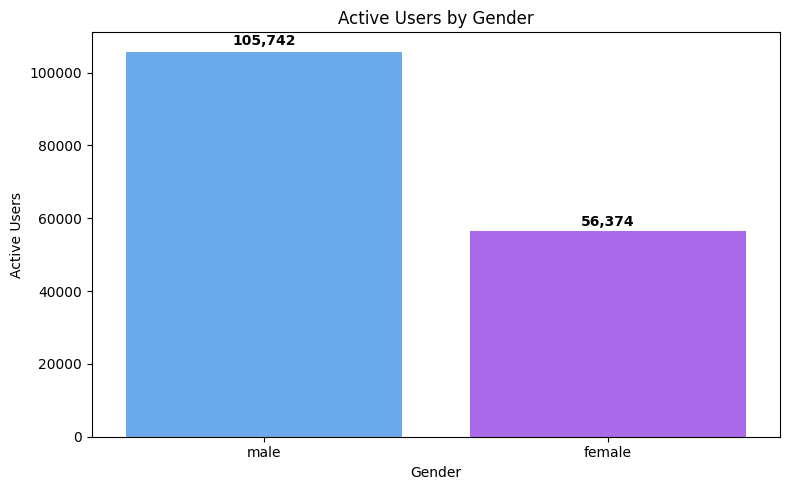

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load ---
df_gender = pd.read_excel("data/user_attr_gender.xlsx")

# --- Basic Info ---
print("Rows:", df_gender.shape[0], "| Columns:", df_gender.shape[1])
print("Columns:", df_gender.columns.tolist())
print("\nMissing values:\n", df_gender.isnull().sum())

# --- Findings: Active Users by Gender ---
gender_summary = (
    df_gender.groupby("Gender")["Active users"]
    .sum()
    .sort_values(ascending=False)
)
print("\nActive Users by Gender:\n", gender_summary)

# --- Visualization with data labels ---
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=gender_summary.index, y=gender_summary.values, palette="cool")

# Add labels above bars
for i, value in enumerate(gender_summary.values):
    ax.text(
        i,
        value + (value * 0.01),       # small offset above the bar
        f"{int(value):,}",            # format number with commas
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Active Users by Gender")
plt.xlabel("Gender")
plt.ylabel("Active Users")
plt.tight_layout()
plt.show()


Rows: 6 | Columns: 2
Columns: ['Age', 'Active users']

Missing values:
 Age             0
Active users    0
dtype: int64

Active Users by Age Group:
 Age
25-34    33526
45-54    31505
35-44    30584
18-24    26439
55-64    22174
65+      13176
Name: Active users, dtype: int64


C:\Users\billy\AppData\Local\Temp\ipykernel_18812\1867033336.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_summary.index, y=age_summary.values, palette="crest")


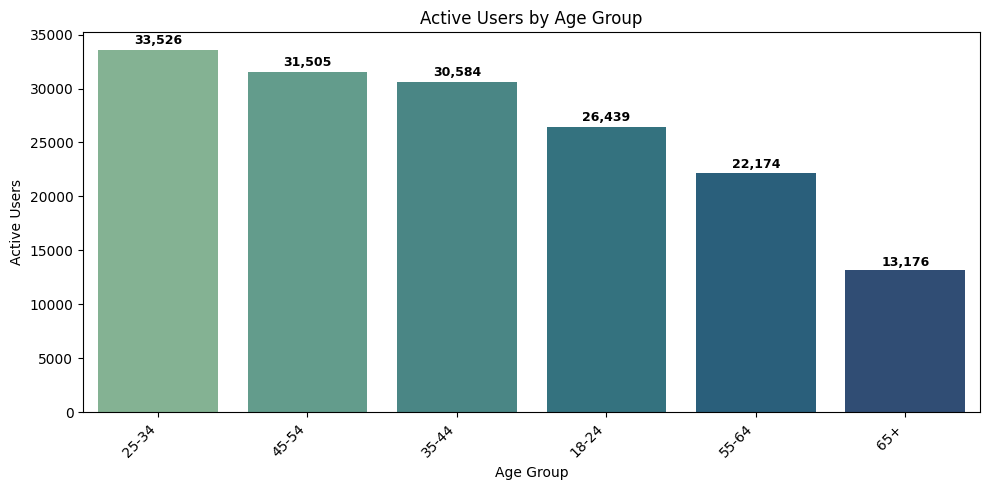

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load ---
df_age = pd.read_excel("data/user_attr_age.xlsx")

# --- Basic Info ---
print("Rows:", df_age.shape[0], "| Columns:", df_age.shape[1])
print("Columns:", df_age.columns.tolist())
print("\nMissing values:\n", df_age.isnull().sum())

# --- Findings: Active Users by Age ---
age_summary = (
    df_age.groupby("Age")["Active users"]
    .sum()
    .sort_values(ascending=False)
)
print("\nActive Users by Age Group:\n", age_summary)

# --- Visualization with data labels ---
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=age_summary.index, y=age_summary.values, palette="crest")

# Add numeric labels
for i, value in enumerate(age_summary.values):
    ax.text(
        i,
        value + (value * 0.01),       # offset slightly above the bar
        f"{int(value):,}",            # add comma formatting
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.title("Active Users by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Active Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Rows: 133 | Columns: 2
Columns: ['Interests', 'Active users']

Missing values:
 Interests       0
Active users    0
dtype: int64

Top 15 Interests by Active Users:
 Interests
News & Politics/Avid News Readers                                   23674
News & Politics/Avid News Readers/Entertainment News Enthusiasts    20447
Banking & Finance/Avid Investors                                    19050
Technology/Technophiles                                             17313
News & Politics/Avid News Readers/Avid Business News Readers        16605
Shoppers/Shopping Enthusiasts                                       15113
Travel/Travel Buffs                                                 15042
Lifestyles & Hobbies/Shutterbugs                                    13832
Sports & Fitness/Sports Fans/Fans of American Football              13812
Media & Entertainment/Movie Lovers                                  11511
News & Politics/Avid News Readers/Avid Political News Readers       11505
Food & Dini

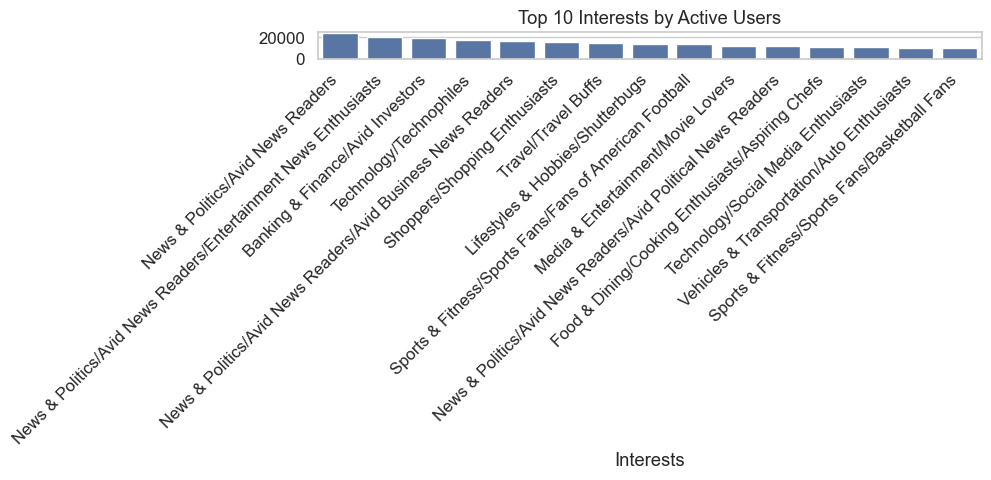

In [13]:
df_interest = pd.read_excel("data/user_attr_interest.xlsx")

print("Rows:", df_interest.shape[0], "| Columns:", df_interest.shape[1])
print("Columns:", df_interest.columns.tolist())
print("\nMissing values:\n", df_interest.isnull().sum())

top_interest = (
    df_interest.groupby("Interests")["Active users"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
print("\nTop 15 Interests by Active Users:\n", top_interest)

plt.figure()
sns.barplot(x=top_interest.index, y=top_interest.values)
plt.title("Top 10 Interests by Active Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



Top 10 Interests by Active Users:
 Interests
News & Politics/Avid News Readers                                   23674
News & Politics/Avid News Readers/Entertainment News Enthusiasts    20447
Banking & Finance/Avid Investors                                    19050
Technology/Technophiles                                             17313
News & Politics/Avid News Readers/Avid Business News Readers        16605
Shoppers/Shopping Enthusiasts                                       15113
Travel/Travel Buffs                                                 15042
Lifestyles & Hobbies/Shutterbugs                                    13832
Sports & Fitness/Sports Fans/Fans of American Football              13812
Media & Entertainment/Movie Lovers                                  11511
Name: Active users, dtype: int64


C:\Users\billy\AppData\Local\Temp\ipykernel_7692\3114892258.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




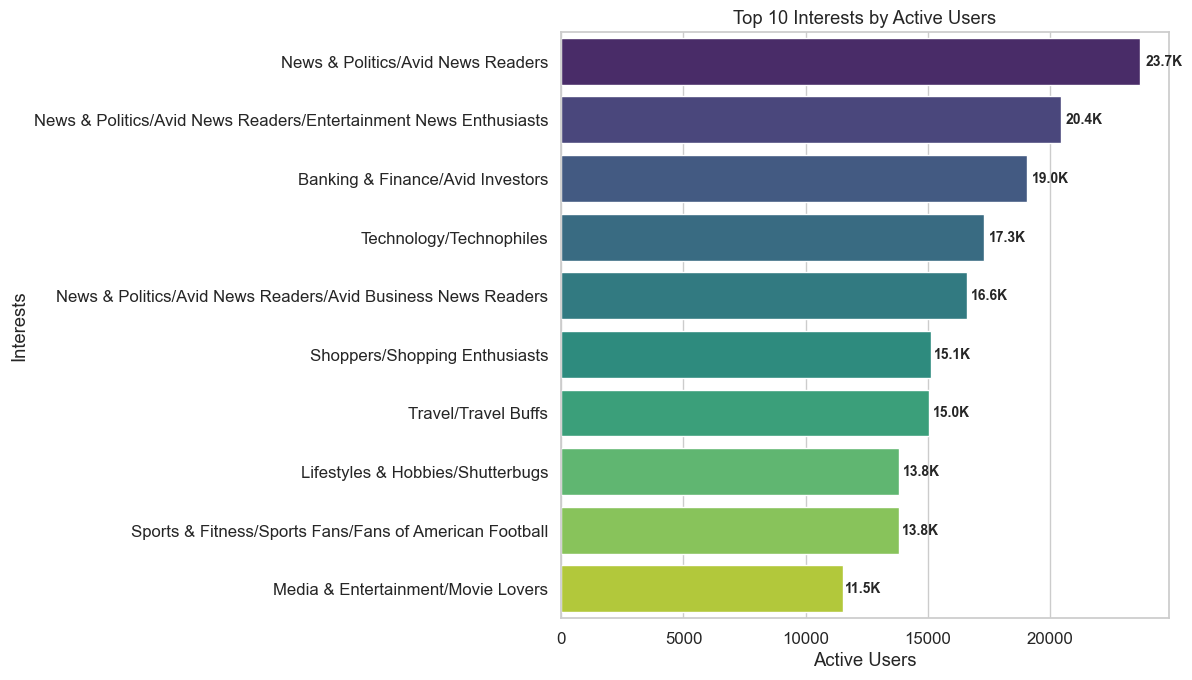

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (12, 7)

# --- Load data ---
df_interest = pd.read_excel("data/user_attr_interest.xlsx")

# --- Aggregate: Top 10 Interests by Active Users ---
top_interest = (
    df_interest.groupby("Interests")["Active users"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Interests by Active Users:\n", top_interest)

# --- Helper to format numbers in K (thousands) ---
def format_k(x):
    return f"{round(x/1000, 1)}K"

# --- Plot: horizontal bar chart ---
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=top_interest.values,
    y=top_interest.index,
    palette="viridis",
    orient="h"
)

# Add data labels on bars
for i, value in enumerate(top_interest.values):
    ax.text(
        value + (value * 0.01),        # a bit to the right of the bar
        i,
        format_k(value),               # show as "23.7K"
        va="center",
        ha="left",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Top 10 Interests by Active Users")
plt.xlabel("Active Users")
plt.ylabel("Interests")
plt.tight_layout()
plt.show()


Rows: 72 | Columns: 2
Columns: ['Language', 'Active users']

Missing values:
 Language        0
Active users    0
dtype: int64

Top 10 Languages by Active Users:
 Language
English       1203536
Vietnamese      60708
Spanish         15026
Chinese         12852
French           6270
Japanese         4225
Portuguese       3267
Korean           2793
Russian          2123
German           1402
Name: Active users, dtype: int64


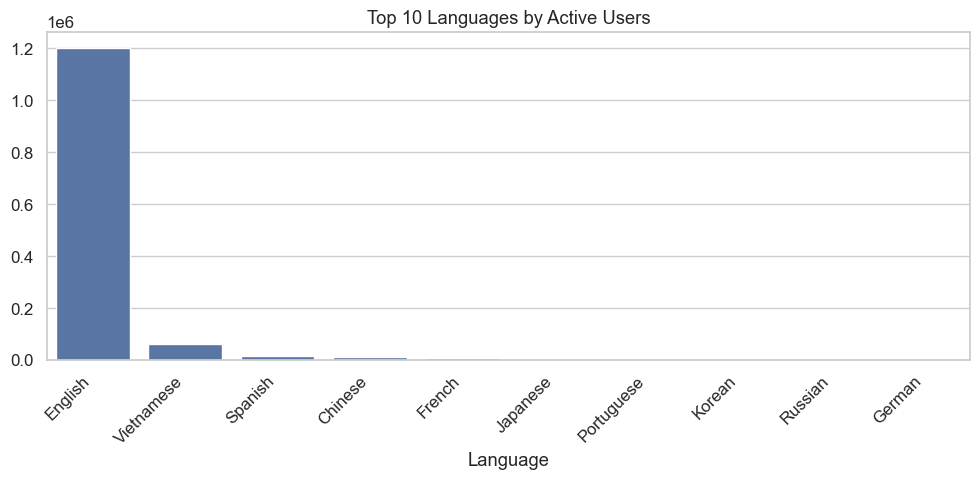

In [10]:
df_language = pd.read_excel("data/user_attr_language.xlsx")

print("Rows:", df_language.shape[0], "| Columns:", df_language.shape[1])
print("Columns:", df_language.columns.tolist())
print("\nMissing values:\n", df_language.isnull().sum())

top_lang = (
    df_language.groupby("Language")["Active users"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 Languages by Active Users:\n", top_lang)

plt.figure()
sns.barplot(x=top_lang.index, y=top_lang.values)
plt.title("Top 10 Languages by Active Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Rows: 195 | Columns: 3
Columns: ['First user primary channel group (Default Channel Group)', 'Browser', 'New users']

Missing values:
 First user primary channel group (Default Channel Group)    0
Browser                                                     0
New users                                                   0
dtype: int64

Top 10 Acquisition Channels:
 First user primary channel group (Default Channel Group)
Direct              23
Referral            23
Organic Search      20
Paid Search         18
Cross-network       15
Organic Social      13
Unassigned          13
Paid Shopping       12
Organic Shopping    11
Paid Social         10
Name: count, dtype: int64


C:\Users\billy\AppData\Local\Temp\ipykernel_18652\535477224.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=channel_summary.index, y=channel_summary.values, palette="crest")


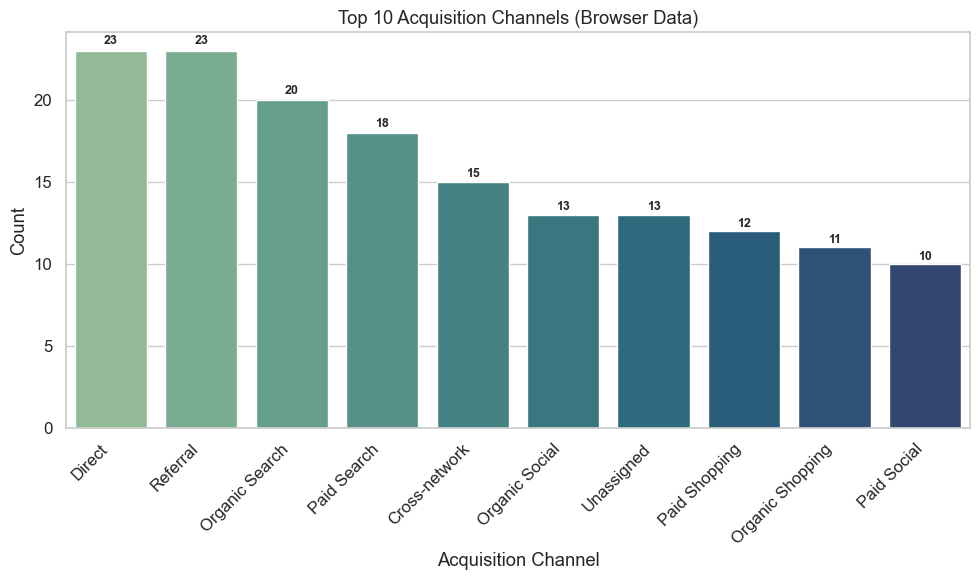

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization setup ---
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 5)

# --- Load ---
df_browser = pd.read_csv("data/user_browser.csv")

# --- Basic Info ---
print("Rows:", df_browser.shape[0], "| Columns:", df_browser.shape[1])
print("Columns:", df_browser.columns.tolist())
print("\nMissing values:\n", df_browser.isnull().sum())

# --- Findings ---
# Top 10 acquisition channels
channel_col = "First user primary channel group (Default Channel Group)"
active_col = "Active users" if "Active users" in df_browser.columns else None

if active_col:
    channel_summary = (
        df_browser.groupby(channel_col)[active_col]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
else:
    channel_summary = df_browser[channel_col].value_counts().head(10)

print("\nTop 10 Acquisition Channels:\n", channel_summary)

# --- Visualization with data labels ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=channel_summary.index, y=channel_summary.values, palette="crest")

# Add numeric labels on top of bars
for i, value in enumerate(channel_summary.values):
    ax.text(
        i,
        value + (value * 0.01),        # small offset above each bar
        f"{int(value):,}",             # format with comma separators
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.title("Top 10 Acquisition Channels (Browser Data)")
plt.xlabel("Acquisition Channel")
plt.ylabel("Active Users" if active_col else "Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Rows: 195 | Columns: 3
Columns: ['First user primary channel group (Default Channel Group)', 'Browser', 'New users']

Missing values:
 First user primary channel group (Default Channel Group)    0
Browser                                                     0
New users                                                   0
dtype: int64

Top 10 Browsers by New Users:
 Browser
Chrome              478065
Safari              457899
Safari (in-app)     227878
Edge                 28482
Android Webview      23390
Samsung Internet      8725
Firefox               8050
Opera                 1326
Waterfox               695
(not set)              162
Name: New users, dtype: int64


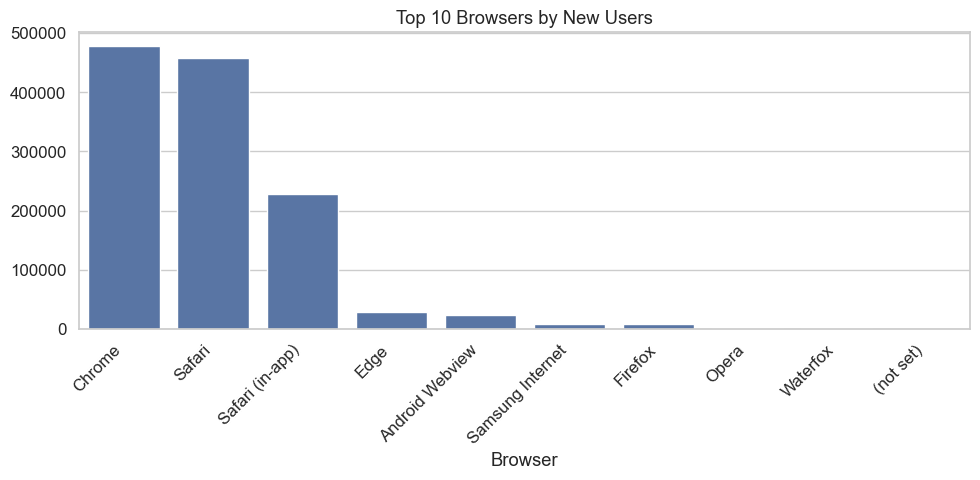

In [12]:
df_browser = pd.read_csv("data/user_browser.csv")

print("Rows:", df_browser.shape[0], "| Columns:", df_browser.shape[1])
print("Columns:", df_browser.columns.tolist())
print("\nMissing values:\n", df_browser.isnull().sum())

top_browser = (
    df_browser.groupby("Browser")["New users"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 Browsers by New Users:\n", top_browser)

plt.figure()
sns.barplot(x=top_browser.index, y=top_browser.values)
plt.title("Top 10 Browsers by New Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
